# 시각화를 해보자

## 연도 기준 통계 목록

- 기간별 통계
  - 연도별 전체 유학생수 통계
  - 연도별 유학생 성별 통계
  - 연도별 나이 통계
  - 연도별 상위 3개 국가 통계
  - 연도별 상위 3개 학교 통계
  - 연도별 체류자격 통계
  
- 국가별 통계  
  - 국가별 성별 통계
  - 국가별 체류자격 통계
  - 국가별 상위 3개 학교 통계

- 연령별 통계
  - 연령별 성별 통계
  - 연령별 체류 자격 통계
  - 연령별 상위 3개 학교별 통계

In [11]:
import pandas as pd
import matplotlib
# 차트 그릴 준비
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 테마지정
sns.set_theme(style="whitegrid")
sns.set_palette('deep', n_colors=20)

# 나눔 고딕으로 폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# # 설치 폰트 확인
# import matplotlib.font_manager
# # [f.fname for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
# [f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

In [12]:
# 데이터 로드
df = pd.read_csv('./data/클렌징_법무부_외국인_유학생_관리정보_fin.csv', encoding='utf-8') 

df.info()

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175883 entries, 0 to 2175882
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   성별       object 
 1   국적명      object 
 2   체류자격     object 
 3   학교명      object 
 4   조사년월     int64  
 5   생년       float64
 6   체류지 시도   object 
 7   체류지 시군구  object 
 8   연령       float64
dtypes: float64(2), int64(1), object(6)
memory usage: 149.4+ MB
Index(['성별', '국적명', '체류자격', '학교명', '조사년월', '생년', '체류지 시도', '체류지 시군구', '연령'], dtype='object')


In [ ]:
# 데이터형 맞추기
df['조사년월'] = pd.to_datetime(df['조사년월'], format='%Y%m')

# 정렬해두기
df = df.sort_values(by=['조사년월'])

In [ ]:
print(df['조사년월'].unique())
print(df['조사년월'].info())

['2014-06-01T00:00:00.000000000' '2014-12-01T00:00:00.000000000'
 '2015-06-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2016-06-01T00:00:00.000000000' '2016-12-01T00:00:00.000000000'
 '2017-06-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-06-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-06-01T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2020-06-01T00:00:00.000000000' '2020-12-01T00:00:00.000000000'
 '2021-06-01T00:00:00.000000000' '2021-12-01T00:00:00.000000000'
 '2022-06-01T00:00:00.000000000']
<class 'pandas.core.series.Series'>
Int64Index: 2175883 entries, 2175882 to 0
Series name: 조사년월
Non-Null Count    Dtype         
--------------    -----         
2175883 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 33.2 MB
None


Text(0, 0.5, '유학생수')

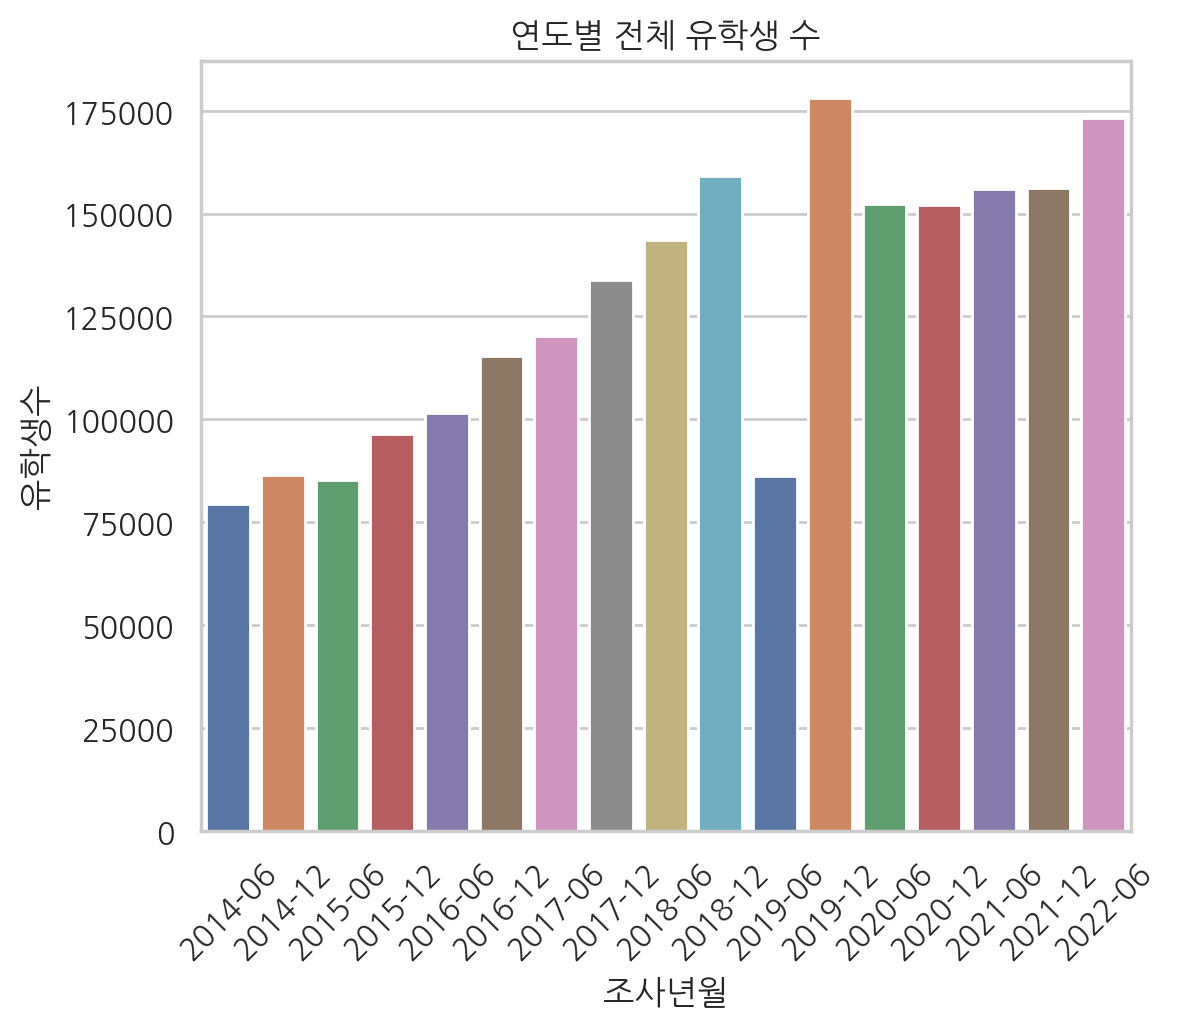

In [ ]:
# 기간별 통계 - 연도별 전체 유학생수 통계
plt.figure(figsize=(6, 5)) # 가로 세로 비율이다.
plt.xticks(rotation=45)
sns.countplot(x=df['조사년월'].dt.strftime('%Y-%m'), data=df, palette='deep')

plt.title('연도별 전체 유학생 수')
plt.xlabel('조사년월')
plt.ylabel('유학생수')

Text(0, 0.5, '유학생수')

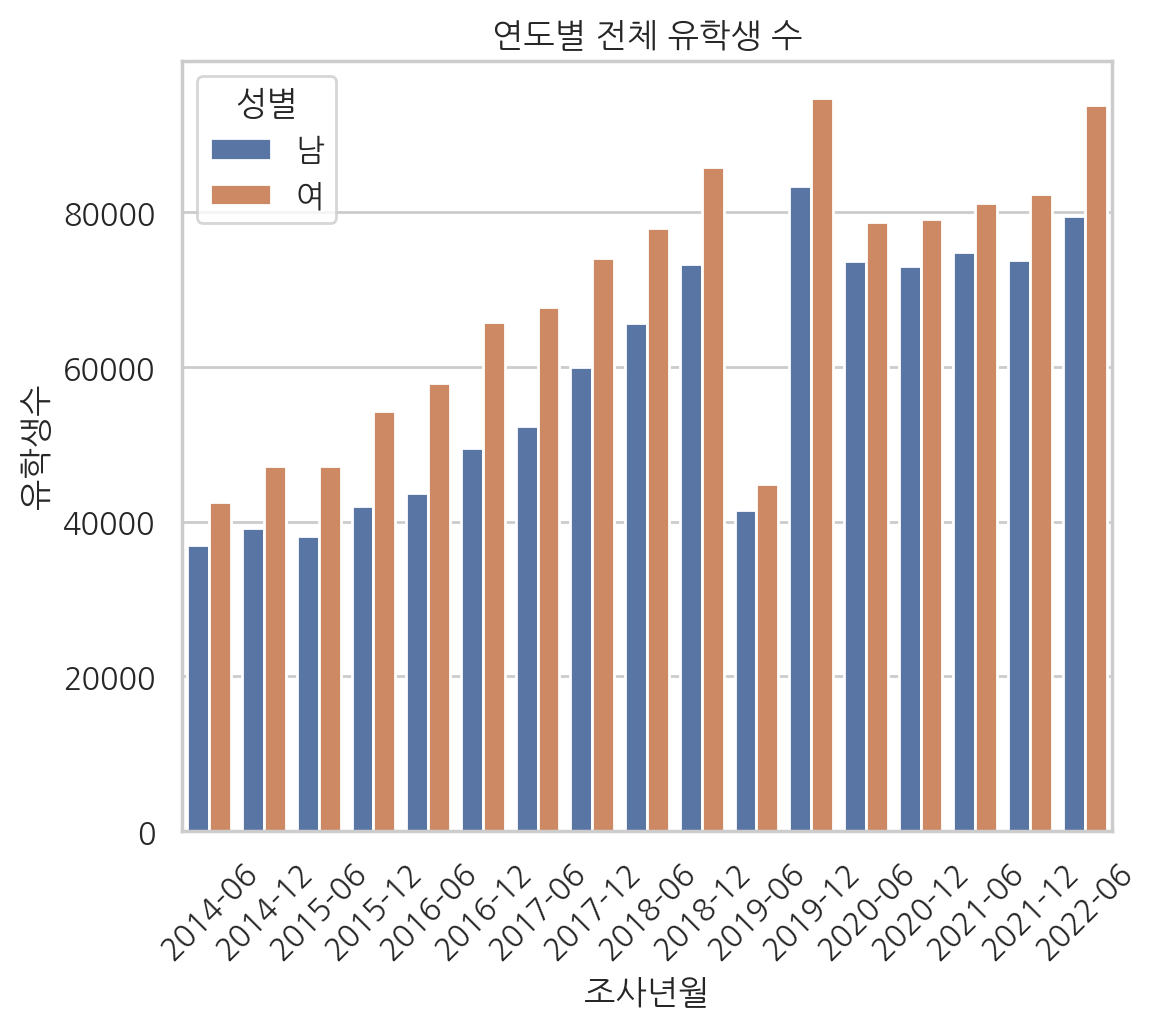

In [ ]:
# 연도별 유학생 성별 통계
plt.figure(figsize=(6, 5)) # 가로 세로 비율이다.
plt.xticks(rotation=45)
sns.countplot(x=df['조사년월'].dt.strftime('%Y-%m'), hue='성별', data=df, palette='deep')

plt.title('연도별 전체 유학생 수')
plt.xlabel('조사년월')
plt.ylabel('유학생수')

In [ ]:
# 체류자격 별 유학생 통계
sns.displot(y=df['체류자격'].sort_values(), data=df)

plt.title('연도별 전체 유학생 수')
plt.xlabel('유학생수')
plt.ylabel('체류자격')

Text(-126.68055555555556, 0.5, '체류자격')

Error in callback <function flush_figures at 0x7f4082a88160> (for post_execute):


KeyboardInterrupt: 

/tmp/ipykernel_1084622/814495910.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x=df['연령'], kind='hist', rug=True, bins=50, height=7, data=df, palette='deep')


Text(-20.055555555555557, 0.5, '유학생수')

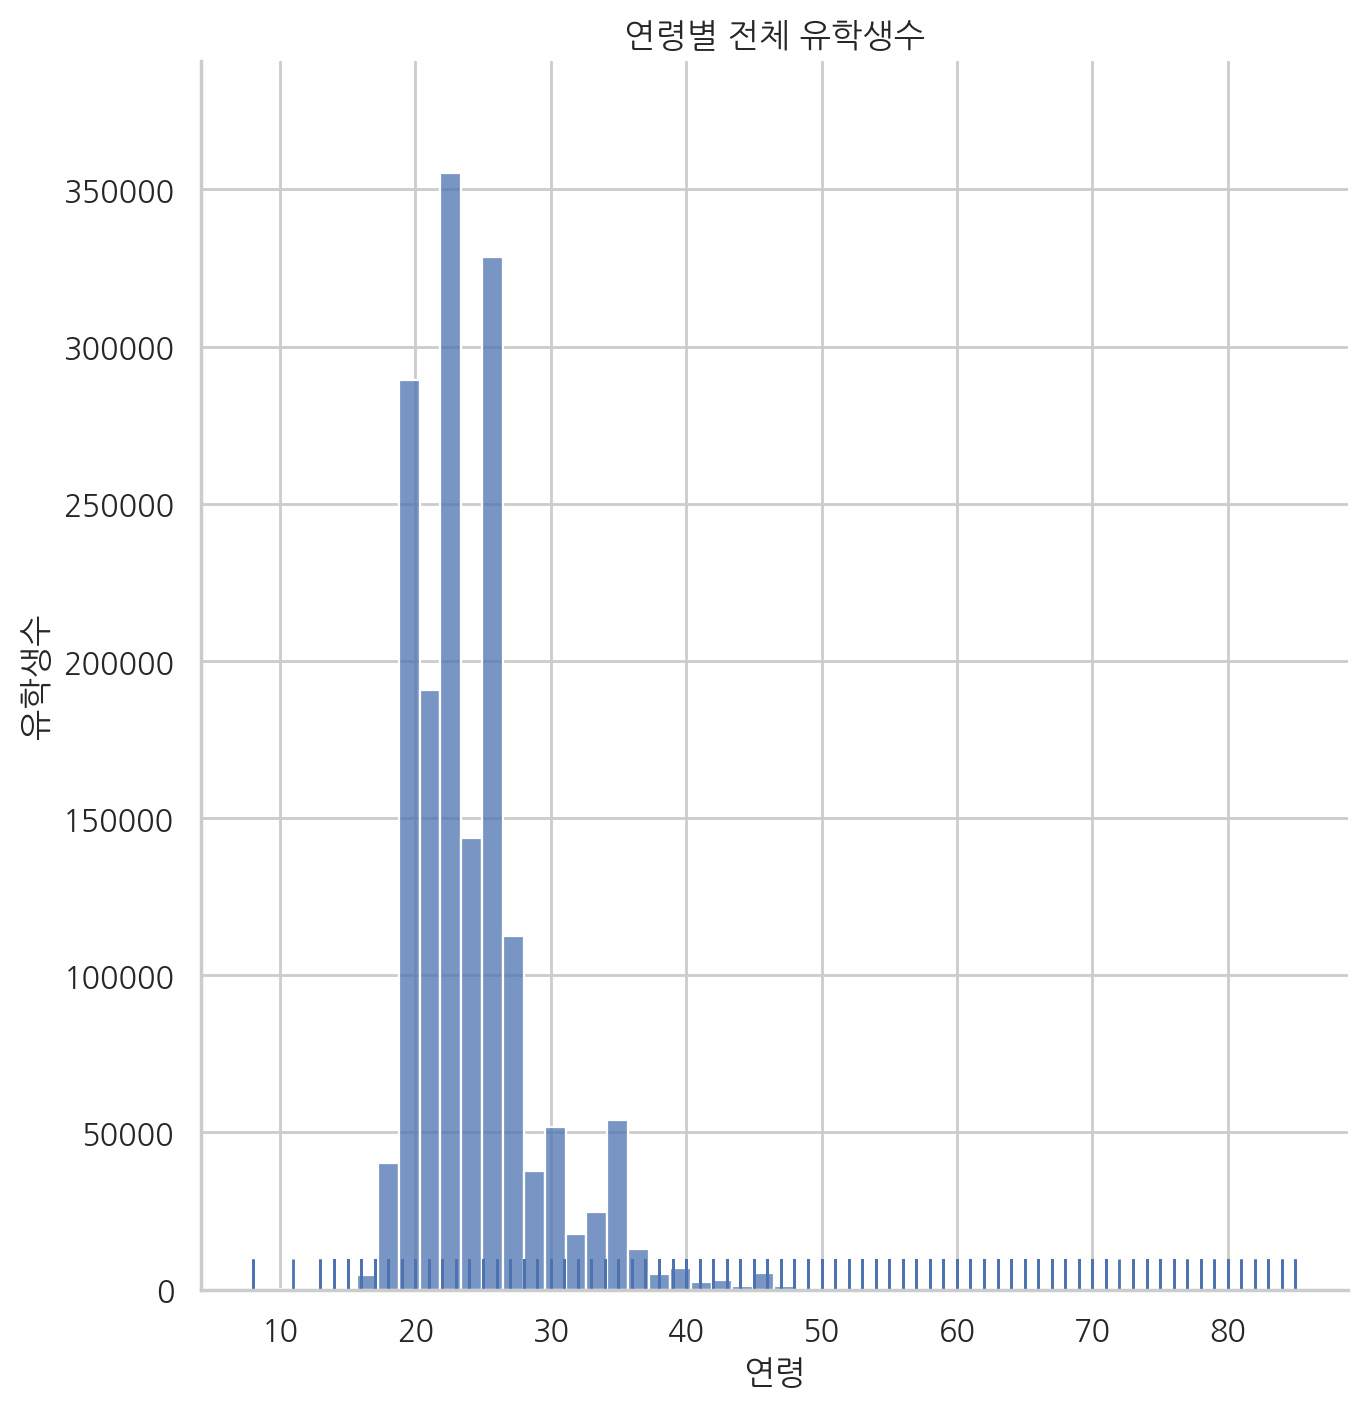

In [ ]:
# 유학생 나이 통계
sns.displot(x=df['연령'], kind='hist', rug=True, bins=50, height=7, data=df, palette='deep')

plt.title('연령별 전체 유학생수')
plt.xlabel('연령')
plt.ylabel('유학생수')

In [ ]:
# 연령별 체류자격 통계
sns.displot(x='체류자격', kind='hist', hue='연령', height=7, bins=50, rug=True, data=df, palette='deep')

plt.title('연령별 전체 유학생수')
plt.xlabel('연령')
plt.ylabel('유학생수')

Text(-13.115277777777775, 0.5, '유학생수')

Error in callback <function flush_figures at 0x7f4082a88160> (for post_execute):


KeyboardInterrupt: 